In [24]:
# 1. Imports
# -----------------------------
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [60]:
# Load dataset
file_path = "/content/Dataset_Diabetes .csv"  # Change path if needed
data = pd.read_csv(file_path, sep=",")
str_cols = data.select_dtypes(include=["object"]).columns
data[str_cols] = data[str_cols].apply(lambda x: x.str.strip())

In [61]:
# Drop ID and No_Pation (not useful for prediction)
data = data.drop(["ID", "No_Pation"], axis=1)

In [62]:
# Encode categorical columns
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

data["CLASS"] = le.fit_transform(data["CLASS"])  # Target


In [63]:
# Split features (X) and target (y)
X = data.drop("CLASS", axis=1)
y = data["CLASS"]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int64


In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [78]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [79]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [80]:
# Predictions
y_pred = svm_model.predict(X_test)

In [81]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 19   0   2]
 [  2   5   3]
 [  1   0 168]]


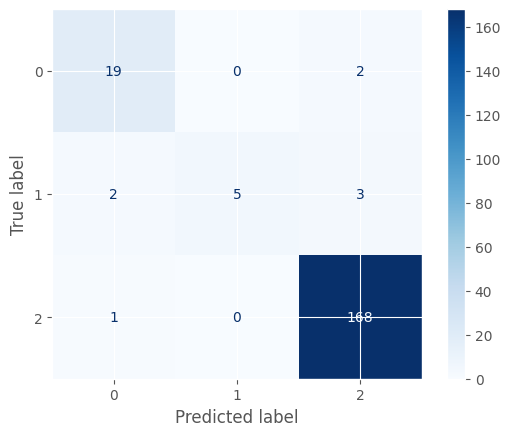

In [82]:
from sklearn.utils.multiclass import unique_labels

# Get only the labels present in y_test and y_pred
labels = unique_labels(y_test, y_pred)

# Plot confusion matrix with correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [83]:
 #Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       1.00      0.50      0.67        10
           2       0.97      0.99      0.98       169

    accuracy                           0.96       200
   macro avg       0.94      0.80      0.84       200
weighted avg       0.96      0.96      0.96       200



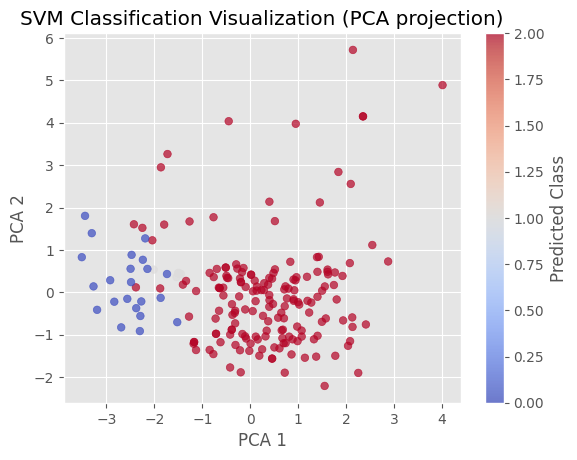

In [84]:
from sklearn.decomposition import PCA

# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap="coolwarm", s=30, alpha=0.7)
plt.title("SVM Classification Visualization (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Predicted Class")
plt.show()


In [85]:
# Print mapping of encoded values back to original labels
print("Class mapping:")
for i, cls in enumerate(le.classes_):
    print(f"{i} → {cls}")


Class mapping:
0 → N
1 → P
2 → Y
